In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

In [2]:
# STEP 1: Import the housing data 
house_data = pd.read_csv('Housing_Data.csv')
house_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
# STEP 2: Regression is used to determine the relationship between two or more variables within a dataset. 
# We will be using the average area income, the average area house age, the average number of rooms, the 
# average number of bedrooms and the area population to make a prediction about the pricing of houses within an area. 
# Create two variables, x and y, to train your linear regression model.
# house_data.columns
x = house_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
y = house_data['Price']


In [4]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and 
# testing. Generally, 75% of your data is used for training and 25% is used to test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [5]:
# STEP 4: Create a linear regression model using the data you have manipulated and scikit-learn's LinearRegression feature.
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [6]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(reg.coef_)

[-3.49401989e-15  9.75046710e-11  3.95873106e-12 -1.43718068e-12
  5.87789366e-15  1.00000000e+00]


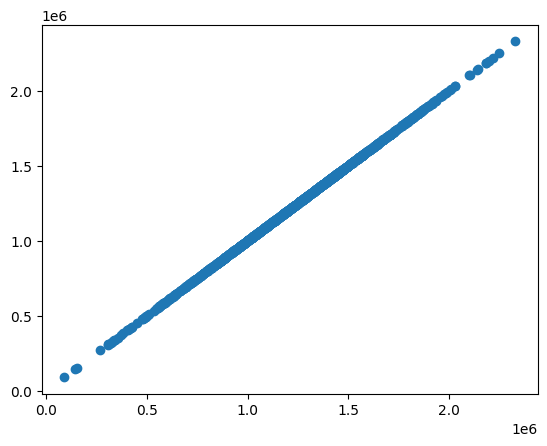

In [7]:
# STEP 6: Create a visualization (scatterplot, histogram, etc) that shows your models predictions and the actual values.
predict = reg.predict(x_test)
plt.scatter(y_test,predict)
plt.show()

In [8]:
# STEP 7: To evaluate the performance of a model more than just the accuracy has to be considered. 
# There are other metrics like the mean absolute error, the mean squared error and the r-squared error. 
# Calculate these three metrics using scikit-learn's metrics import
mean_absolute_earror = metrics.mean_absolute_error(y_test, predict)
mean_squared_error = metrics.mean_squared_error(y_test, predict)
r_squared_error = np.sqrt(metrics.mean_squared_error(y_test, predict))


In [50]:
# Logistic Regression Practice

# STEP 1: Import the titanic data
titanic_data = pd.read_csv('titanic.csv')
# titanic_data[titanic_data['Sex'] == female] = 0
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1}).astype(float)
titanic_data.fillna(titanic_data.Age.mean())
# titanic_data
# titanic_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.0,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",1.0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",0.0,26.000000,0,0,111369,30.0000,C148,C


In [124]:
# STEP 2: We will be using various features of the titanic data to predict whether or not a passenger survived. 
# Create x and y variables to train your logistic regression model. 
clean_subset = titanic_data.dropna()
X = clean_subset[['Sex','Age',]]
Y = clean_subset['Survived']

In [125]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and 
# testing. Generally, 75% of your data is used for training and 25% is used to test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [126]:
# STEP 4: Create a logistic regression model using the data you have manipulated and scikit-learn's LogisticRegression 
# feature.
log = LogisticRegression()
log.fit(X_train, Y_train)


LogisticRegression()

In [127]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(log.coef_)

[[ 2.20667654 -0.02714951]]


In [128]:
# STEP 6: Logistic regression models are evaluated differently than linear regression models. 
# Use the appropriate metrics features from scikit learn to create a report and a matrix for your model
# prediction = log.predict(X_test)
# Report
print(classification_report(Y_test,prediction))
# plt.show()

              precision    recall  f1-score   support

           0       0.36      0.31      0.33        13
           1       0.74      0.79      0.76        33

    accuracy                           0.65        46
   macro avg       0.55      0.55      0.55        46
weighted avg       0.64      0.65      0.64        46



In [129]:
prediction = log.predict(X_test)
cm = confusion_matrix(Y_test, prediction)
cm

array([[13,  0],
       [10, 23]], dtype=int64)

C:\Users\hugox\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


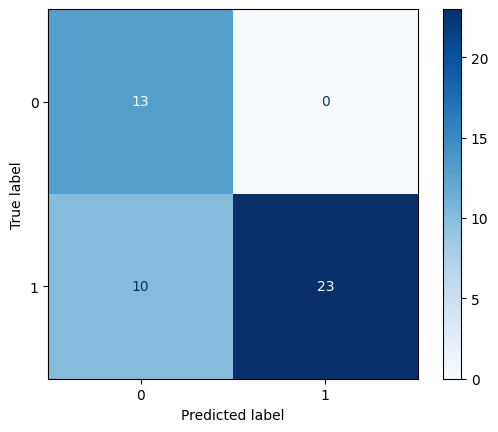

In [130]:
matrix = plot_confusion_matrix(log, X_test, Y_test, cmap=plt.cm.Blues)
matrix
plt.show()